# Group 103


## Anudeep Alam



### Introduction and Motivation

For this Project, my goal was to learn, practice, and immplement different classification machine learning algorithms that have been talked about in class and are in popular use in the world. My only experience with python and machine learning was in COGS 108, and I wanted to further my knowledge in Python and Machine Learning. Furthermore, the idea of using EEG signals to train models, which can then predict a certain aspect about us, for example if this person intoxicated, happy, sad, concentrated, etc, is simply fascinating to me.

The reason I decided to choose EEG data dealing with confused state, is because it is something I found fun and interesting. Also, the data  easy to read and understandable. Acccording to the Kaggle, this dataset was "collected from ten students, each watching ten videos. Therefore, it can be seen as only 100 data points for these 12000+ rows. If you look at this way, then each data point consists of 120+ rows, which is sampled every 0.5 seconds (so each data point is a one minute video). Signals with higher frequency are reported as the mean value during each 0.5 second." The kaggle dataset also includes a demographic.csv, however it does't seem relevant to the project and thus will not be used. 

In this project we will use classical machine learning algorithms such as Logistic Regression, Support Vector Machine, Linear Discriminant Analysis, and Random Forest Regression to train a classifier model to predict whether a student is confused or not


Dataset link: https://www.kaggle.com/wanghaohan/confused-eeg

Acknowledgment: Wang, H., Li, Y., Hu, X., Yang, Y., Meng, Z., & Chang, K. M. (2013, June). Using EEG to Improve Massive Open Online Courses Feedback Interaction. In AIED Workshops. 


#### Imports

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier



### Data Introduction and Cleaning

In [2]:
df = pd.read_csv("EEG_data.csv")

df.columns


Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln'],
      dtype='object')

As we can see from the column names we have features such as SubjectID, VideoID, Attention, Mediation, Theta, Alpha1, Alpha2, Beta1, Beta2, Gamma1, Gamma2, predefinedlabel, user-defiedlabeln. In the scope of this project SubjectID and videoID don't seem to be relevant and thus we can drop them. We also don't need the predefinedlabel since, are focus is on the response of the user. However before we do is first its important to see that there is a relatively even amount of trials of data per subject

In [3]:
df['SubjectID'].value_counts()

3.0    1314
1.0    1301
4.0    1295
2.0    1284
8.0    1282
7.0    1276
6.0    1275
5.0    1262
0.0    1261
9.0    1261
Name: SubjectID, dtype: int64

Next we need to divide our data into 80/20 Splits 

In [4]:
df.describe()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
count,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000
mean,4.487394,4.390602,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.479978,0.512606
std,2.865373,2.913232,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499618,0.499861
min,0.000000,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,0.000000
25%,2.000000,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000,0.000000
50%,4.000000,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,0.000000,1.000000
75%,7.000000,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000,1.000000
max,9.000000,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000,1.000000


Looking at our data, it is interesting to see that the standard deviation is close in value or greater than the mean for various signals such as raw, delta, theta, Alpha1, Alpha2, Beta1, Beta2, Gamma1, Gamma2. This is not sigificant yet, however it does show our data is not normally distributed and is something to look out for. We can visualize this further through boxplots

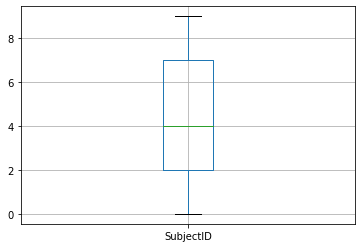

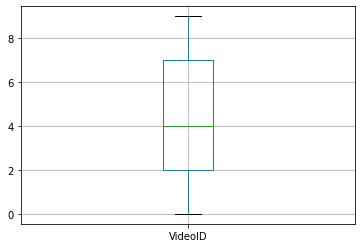

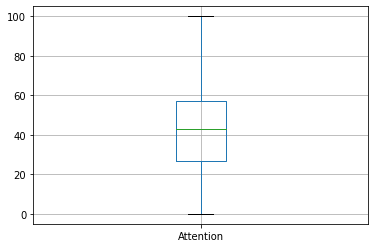

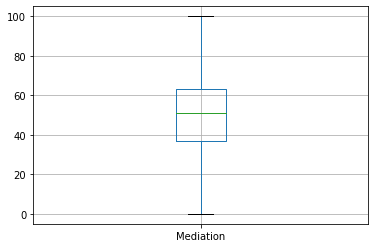

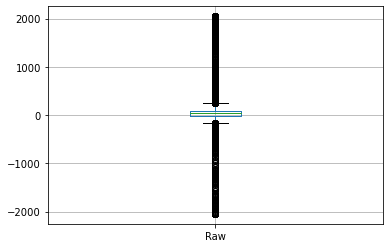

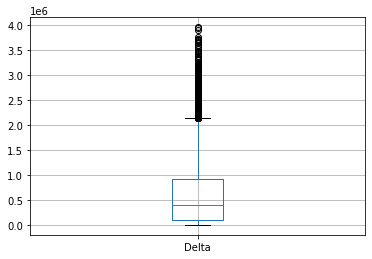

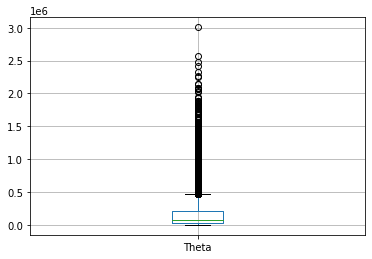

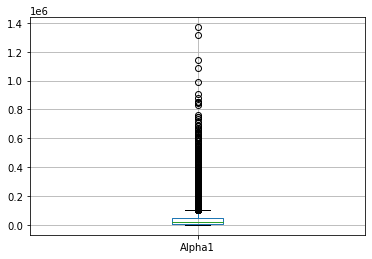

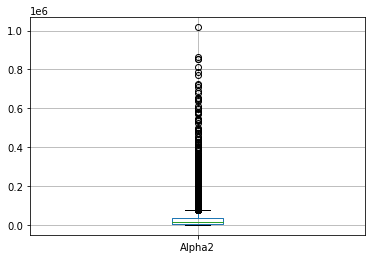

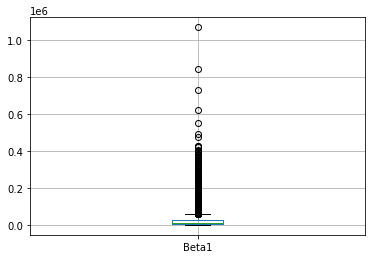

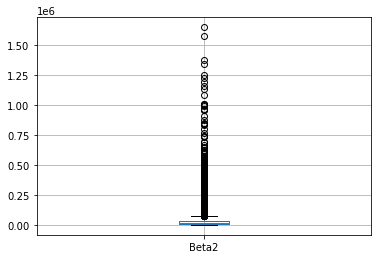

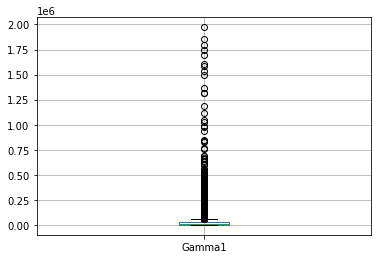

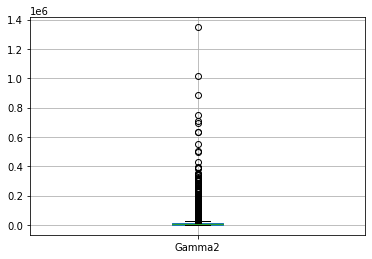

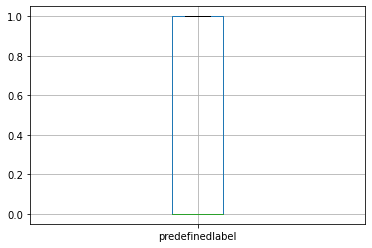

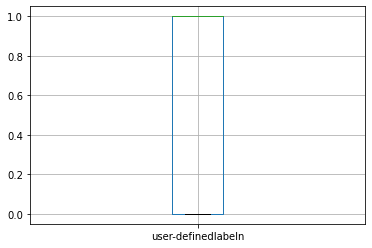

In [5]:
for column in df:
    plt.figure()
    df.boxplot([column])

From the boxplots, we can see that there are numerous amounts of outliers in our datasets as represented in our datasets. However due to not knowing the significance of why these outliers exists, and are they really outliers, we will let them stay in our dataset. Before we proceed into our Machine Learning Algorithms is that we should do the classic 80/20 Split, in which 80% of data is training, 20% is testing. Furthermore, we need to make sure we get 80% of each subjectID.

In [6]:
subject0 = df[df['SubjectID'] == 0]
val = math.floor(.8*len(subject0.index))
df_train = subject0.iloc[:val,:]
df_test = subject0.iloc[val:,:]


subject1 = df[df['SubjectID'] == 1.0]
val = math.floor(.8*len(subject1.index))
df_train = df_train.append(subject1.iloc[:val,:])
df_test = df_test.append(subject1.iloc[val:,:])

subject2 = df[df['SubjectID'] == 2.0]
val = math.floor(.8*len(subject2.index))
df_train = df_train.append(subject2.iloc[:val,:])
df_test = df_test.append(subject2.iloc[val:,:])

subject3 = df[df['SubjectID'] == 3.0]
val = math.floor(.8*len(subject3.index))
df_train = df_train.append(subject3.iloc[:val,:])
df_test = df_test.append(subject3.iloc[val:,:])

subject4 = df[df['SubjectID'] == 4.0]
val = math.floor(.8*len(subject4.index))
df_train = df_train.append(subject4.iloc[:val,:])
df_test = df_test.append(subject4.iloc[val:,:])

subject5 = df[df['SubjectID'] == 5.0]
val = math.floor(.8*len(subject5.index))
df_train = df_train.append(subject5.iloc[:val,:])
df_test = df_test.append(subject5.iloc[val:,:])

subject6 = df[df['SubjectID'] == 6.0]
val = math.floor(.8*len(subject6.index))
df_train = df_train.append(subject6.iloc[:val,:])
df_test = df_test.append(subject6.iloc[val:,:])

subject7 = df[df['SubjectID'] == 7.0]
val = math.floor(.8*len(subject7.index))
df_train = df_train.append(subject7.iloc[:val,:])
df_test = df_test.append(subject7.iloc[val:,:])

subject8 = df[df['SubjectID'] == 8.0]
val = math.floor(.8*len(subject8.index))
df_train = df_train.append(subject8.iloc[:val,:])
df_test = df_test.append(subject8.iloc[val:,:])

subject9 = df[df['SubjectID'] == 9.0]
val = math.floor(.8*len(subject9.index))
df_train = df_train.append(subject9.iloc[:val,:])
df_test = df_test.append(subject9.iloc[val:,:])

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)



After splitting up our data we should remove unecessary colunms. In this case that would be SubjectID, Video, and predefinedlabel. SubjectID,VideoID,Attetion,Mediation, but we want to focus on training a classifier just based on EEG signals

In [7]:
df_train = df_train.drop(columns = ['SubjectID', 'VideoID', 'Attention', 'Mediation', 'predefinedlabel'])
df_test = df_test.drop(columns = ['SubjectID', 'VideoID', 'Attention', 'Mediation', 'predefinedlabel'])


### Machine Learning Algorithms

#### Logistic Regression

Our data is good to go, and we can test our first machine learning algorithm Logisitc Regression.

In [8]:
X_train = df_train.drop('user-definedlabeln',axis=1)
Y_train = df_train['user-definedlabeln']

X_test = df_test.drop('user-definedlabeln',axis =1)
Y_test = df_test['user-definedlabeln']



In [9]:

model = LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print("Test acccuracy:",model.score(X_test,Y_test))

Test acccuracy: 0.5013634592910011


Ok running our logistic regression model against the test dataset, we recieve a pretty bad accuracy of 50%. Before possibly finding explainations why this is so lets run other machine learning models

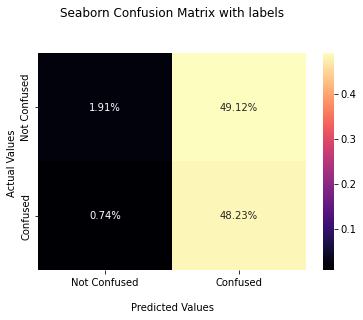

In [10]:
#SOURCE CODE: https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

pred = model.predict(X_test)
cm = confusion_matrix(Y_test,y_pred)
ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='magma')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Confused','Confused'])
ax.yaxis.set_ticklabels(['Not Confused','Confused'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### SVM

In [11]:
model = SVC()
model.fit(X_train, Y_train)
print("test_accuracy:",model.score(X_test,Y_test))


test_accuracy: 0.6408258667705493


64% is better than before, but it isn't perfect, lets say if we can improve our test_accuracy with tune parameters

##### 1. Regularization (C)

In [27]:
model_c = SVC(C=10)
model_c.fit(X_train, Y_train)
print("Accuracy:",model_c.score(X_test, Y_test))

Accuracy: 0.6431632255551227


In [28]:
model_c = SVC(C=100)
model_c.fit(X_train, Y_train)
print("Accuracy:",model_c.score(X_test, Y_test))

Accuracy: 0.6392676275808337


##### 2. Gamma

In [29]:

model_g = SVC(gamma=10)
model_g.fit(X_train, Y_train)
print("Accuracy:",model_g.score(X_test, Y_test))



Accuracy: 0.48967666536813403


##### 3. Kernel

In [ ]:
#model_k = SVC(kernel='linear')
#model_k.fit(X_train, Y_train)
#model_k.score(X_test, Y_test)

#takes too long

In [30]:
model_k = SVC(kernel='rbf')
model_k.fit(X_train, Y_train)
print("Accuracy:",model_k.score(X_test, Y_test))

Accuracy: 0.6408258667705493


In [31]:
model_k = SVC(kernel='sigmoid')
model_k.fit(X_train, Y_train)
print("Accuracy:",model_k.score(X_test, Y_test))

Accuracy: 0.5305804440981691


In [32]:
model_k = SVC(kernel='poly')
model_k.fit(X_train, Y_train)
print("Accuracy:",model_k.score(X_test, Y_test))

Accuracy: 0.48967666536813403


In [33]:
model = SVC(C=10,kernel='rbf')
model.fit(X_train, Y_train)
print("Accuracy:",model_k.score(X_test, Y_test))

Accuracy: 0.48967666536813403


Accuracy: 0.6408258667705493


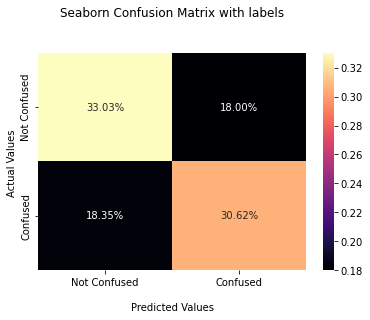

In [45]:
#SOURCE CODE: https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

model_k = SVC(kernel='rbf')
model_k.fit(X_train, Y_train)
print("Accuracy:",model_k.score(X_test, Y_test))

pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='magma')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Confused','Confused'])
ax.yaxis.set_ticklabels(['Not Confused','Confused'])

## Display the visualization of the Confusion Matrix.
plt.show()

With our tune parameters we are only able to increase our test accuracy to 64.3%

#### LDA

In [42]:
model = LinearDiscriminantAnalysis(n_components=1)
model.fit(X_train,Y_train)
print("Accuracy:",model.score(X_test,Y_test))



Accuracy: 0.6365407089988313


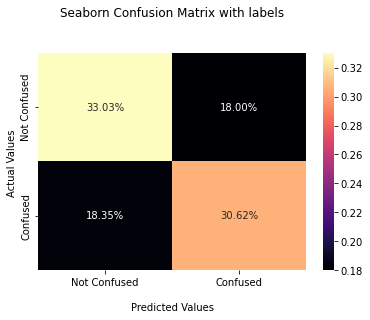

In [43]:
#SOURCE CODE: https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='magma')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Confused','Confused'])
ax.yaxis.set_ticklabels(['Not Confused','Confused'])

## Display the visualization of the Confusion Matrix.
plt.show()

We get a test accuracy of 63.6% which is close to the svm, however the LDA only takes .8s which is significantly faster

#### Random Forest Regression

In [53]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train,Y_train)
print("Accuracy:",model.score(X_test,Y_test))


Accuracy: 0.6081028437865212


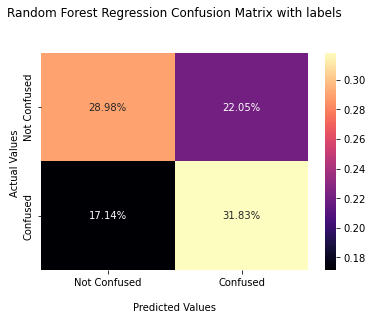

In [55]:
#SOURCE CODE: https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='magma')

ax.set_title('Random Forest Regression Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Confused','Confused'])
ax.yaxis.set_ticklabels(['Not Confused','Confused'])

## Display the visualization of the Confusion Matrix.
plt.show()

Accuracy is at 60% which is not as good as SVM or LDA, however it is still significantly better than logestic Regression